## Association Rules

## Que: Prepare Association rules for data set

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

## Importing the Data

In [ ]:
movies_data = pd.read_csv('/content/my_movies.csv')
movies_data.head(6)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


## Data Understanding

In [ ]:
movies_data.shape

(10, 15)

In [ ]:
movies_data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [ ]:
movies_data_d1=movies_data.iloc[:,5:15]
movies_data_d1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Data Preparation

In [ ]:
# Data preprocessing not required as it is already in transaction format that means dummy variables are already created.

## Model Building

## Association rules with 10% Support and 70% confidence

In [ ]:
movies_set = apriori(movies_data_d1,min_support=0.1,use_colnames=True)
movies_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [ ]:
associat_data = association_rules(movies_set,metric='confidence',min_threshold=0.7)
associat_data


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [ ]:
associat_data[(associat_data['confidence']>0.9) & (associat_data['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
10,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
19,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
...,...,...,...,...,...,...,...,...,...
124,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
125,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
126,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
127,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f255ceef090>,
      dtype=object)

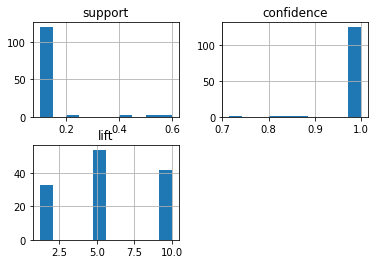

In [ ]:
associat_data[['support','confidence','lift']].hist()

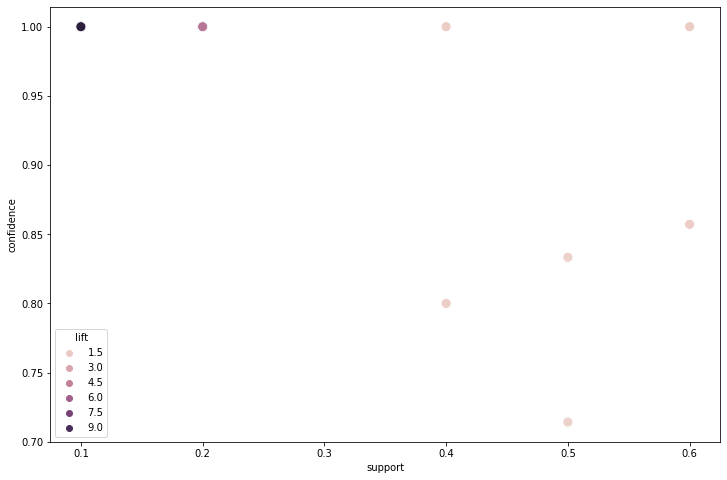

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=associat_data,x='support',y='confidence',hue='lift', s= 100)
plt.show()

## Association rules with 20% Support and 90% confidence

In [ ]:
movies_set = apriori(movies_data_d1,min_support=0.2,use_colnames=True)
movies_set 

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


In [ ]:
associat_data = association_rules(movies_set,metric='confidence',min_threshold=0.9)
associat_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


In [ ]:
associat_data[(associat_data['confidence']>0.9) & (associat_data['lift']>1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f255bf769d0>,
      dtype=object)

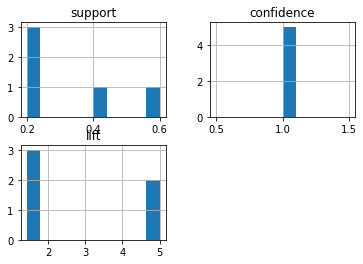

In [ ]:
associat_data[['support','confidence','lift']].hist()

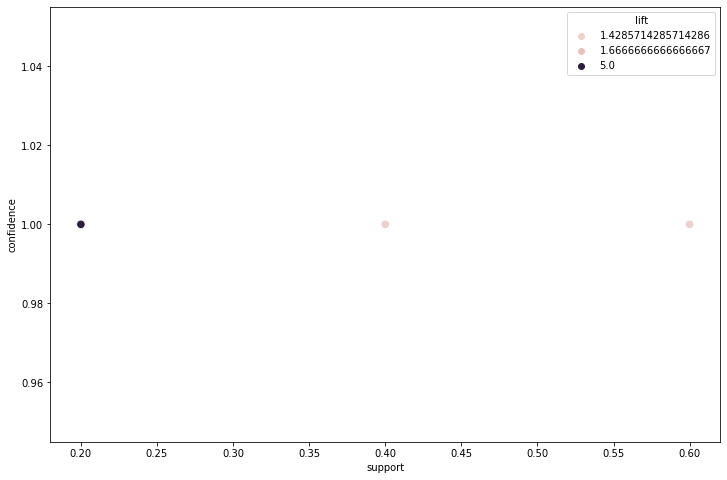

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=associat_data,x='support',y='confidence',hue='lift', s= 70)
plt.show()

## Association rules with 5% Support and 60% confidence



In [ ]:
movies_set = apriori(movies_data_d1,min_support=0.05,use_colnames=True)
movies_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [ ]:
associat_data = association_rules(movies_set,metric='confidence',min_threshold=0.6)
associat_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [ ]:
associat_data[(associat_data['confidence']>0.7) & (associat_data['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
11,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
12,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
14,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
24,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
130,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
131,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
132,"(Sixth Sense, Harry Potter1)","(LOTR2, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f255bd41dd0>,
      dtype=object)

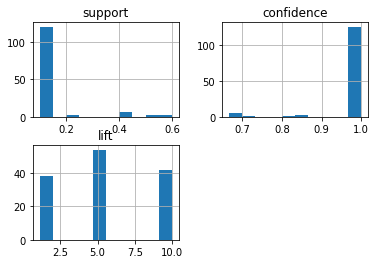

In [ ]:
associat_data[['support','confidence','lift']].hist()

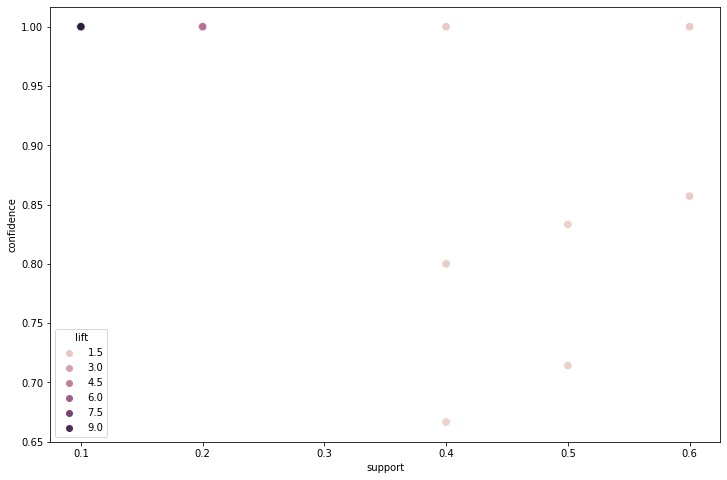

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=associat_data,x='support',y='confidence',hue='lift', s= 70)
plt.show()

In [ ]:
def to_list(i):
    return (sorted(list(i)))


ma_X = associat_data.antecedents.apply(to_list)+associat_data.consequents.apply(to_list)

In [ ]:

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [ ]:
# getting rules without any redudancy 
rules_no_redudancy  = associat_data.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85,"(Sixth Sense, LOTR2, LOTR1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
102,"(LOTR2, LOTR1, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
29,"(Sixth Sense, LOTR1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
50,"(LOTR1, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
67,"(Sixth Sense, LOTR2, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
34,"(Sixth Sense, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
111,"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
58,"(Sixth Sense, LOTR, Gladiator)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
27,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
36,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
